In [74]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

train_url = 'https://raw.githubusercontent.com/Sam-Macpherson/PredictingNBAWithMachineLearning/master/data/training_examples_1997-2019.csv'

data = pd.read_csv(train_url)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, shuffle=True)

train_labels = train_data.pop('outcome')
test_labels = test_data.pop('outcome')

model = keras.Sequential([
    keras.layers.Dense(50, activation='sigmoid', autocast=False),
    keras.layers.Dense(2)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_data, train_labels, epochs=50)

Epoch 1/50
17/17 [==============================] - 0s 1ms/step - loss: 0.7527 - accuracy: 0.4990
Epoch 2/50
17/17 [==============================] - 0s 1ms/step - loss: 0.6593 - accuracy: 0.6058
Epoch 3/50
17/17 [==============================] - 0s 1ms/step - loss: 0.6255 - accuracy: 0.7165
Epoch 4/50
17/17 [==============================] - 0s 1ms/step - loss: 0.6166 - accuracy: 0.6913
Epoch 5/50
17/17 [==============================] - 0s 1ms/step - loss: 0.6150 - accuracy: 0.6427
Epoch 6/50
17/17 [==============================] - 0s 2ms/step - loss: 0.6117 - accuracy: 0.6971
Epoch 7/50
17/17 [==============================] - 0s 1ms/step - loss: 0.5852 - accuracy: 0.7728
Epoch 8/50
17/17 [==============================] - 0s 1ms/step - loss: 0.5807 - accuracy: 0.7320
Epoch 9/50
17/17 [==============================] - 0s 1ms/step - loss: 0.6053 - accuracy: 0.6816
Epoch 10/50
17/17 [==============================] - 0s 1ms/step - loss: 0.5752 - accuracy: 0.7806
Epoch 11/50
17/17 [

5/5 - 0s - loss: 0.3328 - accuracy: 0.8915


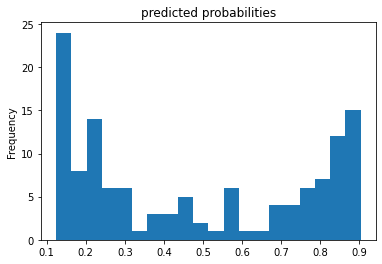

In [75]:
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_data)

probs = pd.Series([pred[1] for pred in predictions])

probs.plot(kind='hist', bins=20, title='predicted probabilities')
plt.show()

In [76]:
from sklearn.metrics import classification_report

y_pred_bool = np.argmax(predictions, axis=1)

print(classification_report(test_labels, y_pred_bool))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        64
           1       0.95      0.83      0.89        65

    accuracy                           0.89       129
   macro avg       0.90      0.89      0.89       129
weighted avg       0.90      0.89      0.89       129



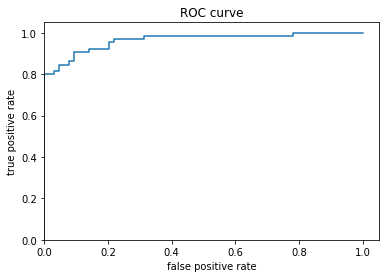

0.9639423076923077

In [77]:
from sklearn.metrics import roc_curve
from sklearn import metrics

fpr, tpr, _ = roc_curve(test_labels, probs)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)
plt.show()
metrics.auc(fpr, tpr)